In [144]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ptk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB       
from sklearn import metrics

sns.set(style="whitegrid")
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['font.size'] = 18
plt.style.use("fivethirtyeight")
sns.set(style="whitegrid")

In [145]:
df = pd.read_csv('./original_tweets_corpes.csv')
df['tweet_dates']= pd.to_datetime(df['tweet_dates'], errors = 'coerce')

FileNotFoundError: File b'./original_tweets_corpes.csv' does not exist

In [104]:
df.sample(n=6)

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
32656,Twitter for iPhone,If schools are mandated to be gun free zones v...,18503.0,79080.0,False,2018-03-12 14:12:11
23356,Twitter for Android,".@FrankLuntz your so-called ""focus groups"" are...",2414.0,4590.0,False,2015-08-07 07:45:18
18853,Twitter for Android,"""@BHANKS26: @realDonaldTrump kevin jonas was t...",31.0,71.0,False,2015-01-07 05:54:17
17772,Twitter for Android,"""@MSmoldt: @realDonaldTrump ""The American drea...",11.0,24.0,False,2014-12-01 12:17:41
22462,Twitter Web Client,Who is @Macys to pretend innocence when they “...,865.0,1320.0,False,2015-07-01 21:11:30
15250,Twitter Web Client,Lightweight @AGSchneiderman is driving busines...,31.0,44.0,False,2014-06-27 17:53:13


bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
student['grade_cat'] = pd.cut(student['grade'], bins=bins, labels=labels)

In [105]:
#fave_median = tweets_df['favorite_count'].median()
#v = np.log(tweets_df['favorite_count'] / fave_median)
g = df.groupby(by=df["tweet_dates"].dt.year)["favorite_count"].median()
df["fave_count_adj"] = df["favorite_count"] / g[df["tweet_dates"].dt.year.values].values
df["fave_count_adj"].describe()

count    37980.000000
mean         4.175094
std         45.998914
min          0.000000
25%          0.489796
50%          1.000000
75%          2.237815
max       3813.115385
Name: fave_count_adj, dtype: float64

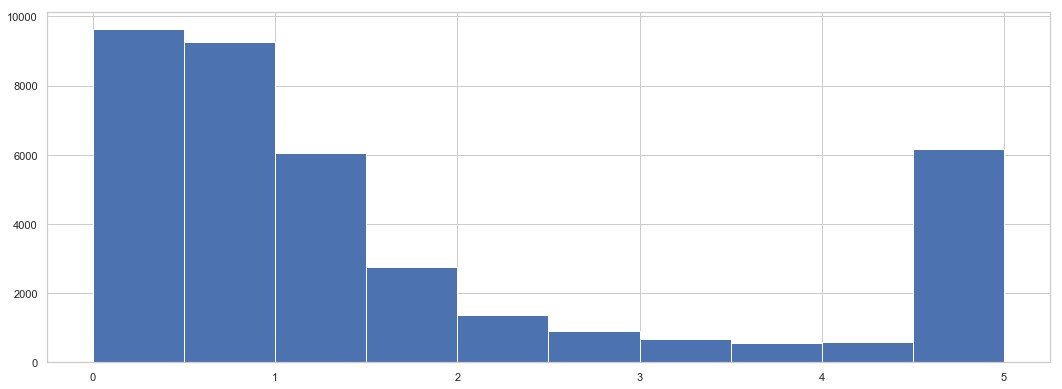

In [143]:
df['fave_count_adj'].clip(upper=5.0).hist()

In [106]:
cuts = [-1, 1, 5, np.inf]
engage_category = ['low', 'med', 'high']
df['engagement'] = pd.cut(df['fave_count_adj'].values, bins = cuts, labels = engage_category)

In [107]:
df.head()

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates,fave_count_adj,engagement
0,Twitter Web Client,Be sure to tune in and watch Donald Trump on L...,253.0,202.0,False,2009-05-04 18:54:25,31.076923,high
1,Twitter Web Client,Donald Trump will be appearing on The View tom...,2.0,3.0,False,2009-05-05 01:00:10,0.461538,low
2,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,3.0,2.0,False,2009-05-08 13:38:08,0.307692,low
3,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,8.0,27.0,False,2009-05-08 20:40:15,4.153846,med
4,Twitter Web Client,"""My persona will never be that of a wallflower...",1421.0,1950.0,False,2009-05-12 14:07:28,300.000000,high


In [127]:
df['engagement'].value_counts()
low_class = 19115

In [123]:
X = df['text']
y = df['engagement']

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)

vect = CountVectorizer(lowercase = True)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

In [133]:
#Null Accuracy
(low_class / 37980) * 100

50.3291205897841

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 4)
vect_TFID = TfidfVectorizer(lowercase = True)
X_train_dtm = vect_TFID.fit_transform(X_train)
X_test_dtm = vect_TFID.transform(X_test)
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

0.5875724065297525

In [137]:
df['text'].iloc[37000]

'....is not Constitutionally Permissable.” Alan Dershowitz Constitutional Lawyer'